In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
  

data = pd.read_excel('./2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')

data.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,NaN,NaN,NaN,NaN,유역평균강수,강우(A지역),강우(B지역),강우(C지역),...,강우(D지역),수위(E지역),수위(D지역),유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역)
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.66,6.4,7,7,8,8,2.54,122.61
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.6
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3,7,10,7,...,14,2.53,122.62,11.3,9,10,15,14,2.53,122.585


In [2]:
data2 = data['유입량'].groupby(data['홍수사상번호'])
data2.size()

홍수사상번호
1.0     226
2.0     100
3.0      81
4.0      34
5.0      94
6.0      46
7.0      51
8.0      41
9.0      68
10.0     86
11.0    110
12.0    127
13.0     67
14.0     50
15.0    262
16.0    205
17.0    125
18.0     65
19.0     95
20.0    264
21.0     84
22.0    285
23.0    128
24.0     94
25.0    103
26.0    160
Name: 유입량, dtype: int64

Timeseries 분석


In [3]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


def preprocessing_timeseries(data):
    
    date_columns={'연': 'year', '월':'month', '일':'day','시간':'hour'}
    data.rename(columns=date_columns, inplace=True)
    data['datetime'] = pd.to_datetime(data[['year','month','day', 'hour']])
    data.drop(['year','month','day', 'hour'], axis=1, inplace=True)
    data=data.set_index('datetime')
   
    feature_columns = ['유역평균강수', '강우A', '강우B', '강우C',  '강우D', '수위E', '수위D']*6

    columns = ['홍수사상번호', '유입량'] + feature_columns 
    data.columns = columns
    data = data[data['홍수사상번호'] <= 25]
    data = data.astype('float')
    return data

def timeseries_decompose(data, num):

    data = data[data['홍수사상번호']==num]
    rcParams['figure.figsize'] = 18,10
    decomposition = sm.tsa.seasonal_decompose(data['유입량'],
                                             model ='multiplicative')
    fig = decomposition.plot()
    plt.show()

    
def timeseries_acf_pacf(data):
    
    pyplot.figure()
    pyplot.subplot(211)
    plot_acf(data['유입량'], ax=pyplot.gca(), lags = 30)
    pyplot.subplot(212)
    plot_pacf(data['유입량'], ax=pyplot.gca(), lags = 30)
    pyplot.show()
    
def timeseries_dickey_fuller(data, num):
    data = data[data['홍수사상번호']==num]
    print ('Result of Dickey-Fuller Test')
    dftest = adfuller(data['유입량'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

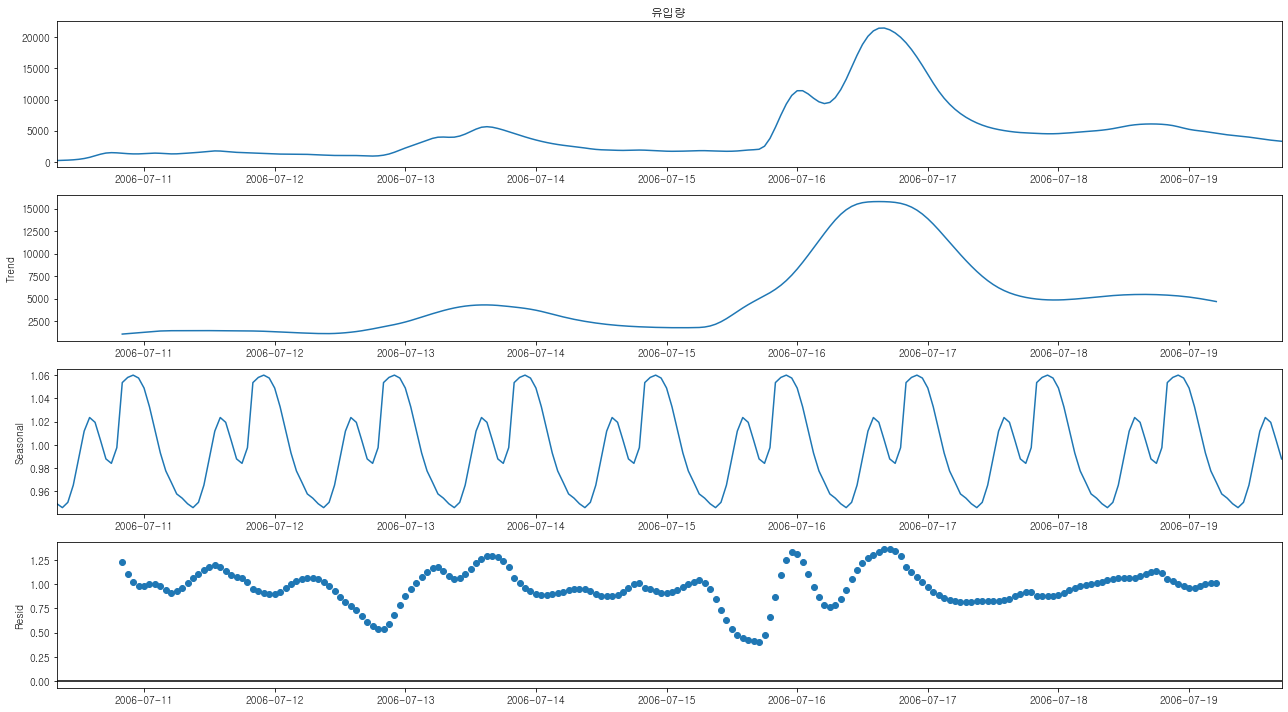

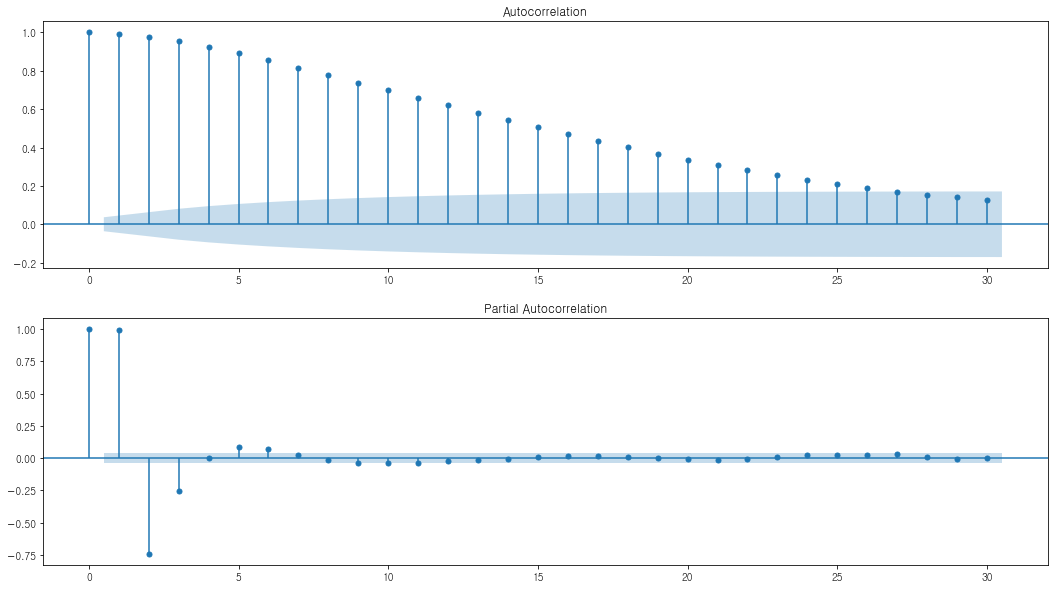

Result of Dickey-Fuller Test
Test Statistic                 -1.148764
p-value                         0.695239
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


In [4]:
data_timeseries = data.copy()
data_timeseries = preprocessing_timeseries(data_timeseries)
timeseries_decompose(data_timeseries, 1)
timeseries_acf_pacf(data_timeseries)
timeseries_dickey_fuller(data_timeseries,2)

dataset 별로 데이터 분류

In [5]:
# dataset1~6  으로 데이터 분할

def preprocessing_dataset(data):
    
    data.drop(['연','월','일', '시간'], axis=1, inplace=True)
    feature_columns = ['유역평균강수', '강우A', '강우B', '강우C',  '강우D', '수위E', '수위D']*6

    columns = ['홍수사상번호', '유입량'] + feature_columns 
    data.columns = columns
    data = data[data['홍수사상번호'] <= 25]
    data = data.astype('float')
    
    for i in range(1,7):
    
    
        globals()['dataset{}'.format(i)] = data.iloc[:,7*i-5:7*i+2]
        globals()['dataset{}'.format(i)]['유입량'] = data.iloc[:,1]
        globals()['dataset{}'.format(i)]['홍수사상번호'] = data.iloc[:,0]



In [6]:
preprocessing_dataset(data)   

홍수사상별로 나눠서 timelag 처리하기

In [7]:
def correlation(dataset, timelag):
    dataset_copy = dataset.copy()
    if timelag == 0:  
        data_heatmap = dataset_copy.drop('홍수사상번호', axis=1, inplace = False)
        data_heatmap = data_heatmap.dropna() 
    else:
        for i in range(1,timelag+1):
            dataset_copy[f'유입량_{i}'] = dataset_copy['유입량'].shift(i)
            
            data_heatmap =  dataset_copy.drop(['홍수사상번호','수위D', '강우B'], axis=1, inplace=False)
            data_heatmap = data_heatmap.dropna() 
        
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(data_heatmap.corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title("cross_correlation", fontdict={'fontsize':12}, pad=12);  
    

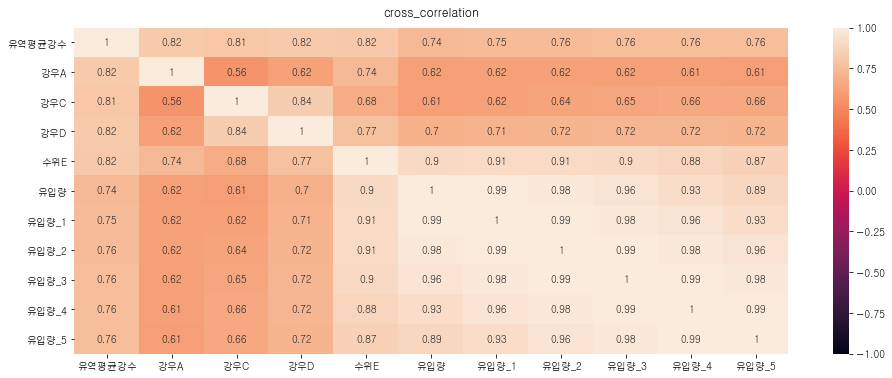

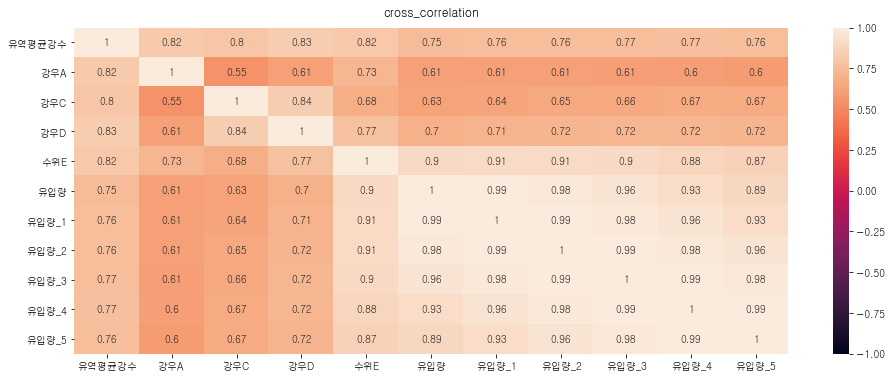

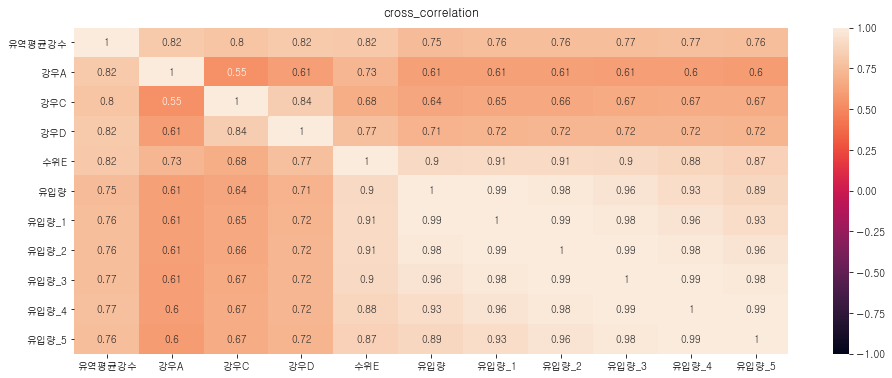

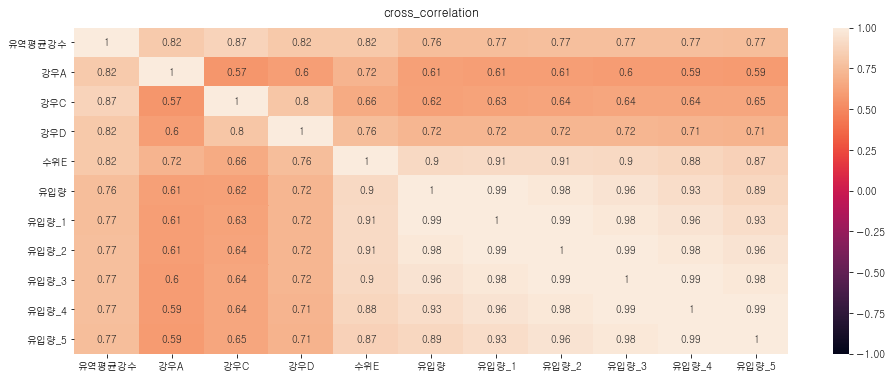

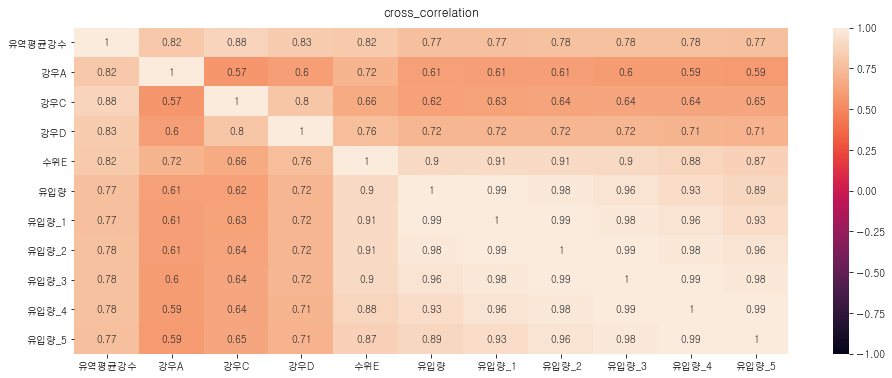

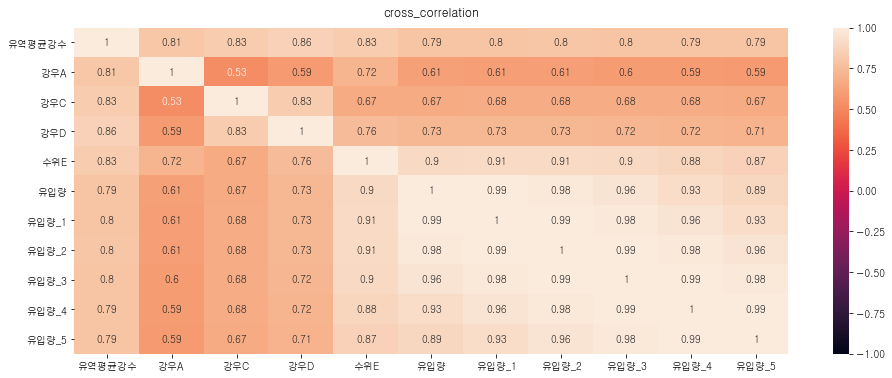

In [8]:
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

#데이터세트별로 각 feature와 유입량과의 correlation분석
for i, dataset in enumerate(datasets):

    correlation(dataset,5)



In [9]:

#각 데이터 세트별로 유입량 timelag가 +2인 칼럼 생성
def get_timelag_dataset(datasets):

    for j, dataset in enumerate(datasets):
        aa = []
        for i in range(1,26):

            globals()['unit{}'.format(i)]  = dataset[dataset['홍수사상번호']==i]
            globals()['unit{}'.format(i)]['유입량_2'] = globals()['unit{}'.format(i)]['유입량'].shift(2)
           # globals()['unit{}'.format(i)]['유입량_3'] = globals()['unit{}'.format(i)]['유입량'].shift(3)
          #  globals()['unit{}'.format(i)]['유입량_4'] = globals()['unit{}'.format(i)]['유입량'].shift(4)
    #         globals()['unit{}'.format(i)]['유입량_5'] = globals()['unit{}'.format(i)]['유입량'].shift(5)
            globals()['unit{}'.format(i)] = globals()['unit{}'.format(i)].dropna()
            aa.append(globals()['unit{}'.format(i)])

        globals()['timelag_dataset{}'.format(j+1)] = pd.concat(aa)

      

In [10]:
get_timelag_dataset(datasets)  

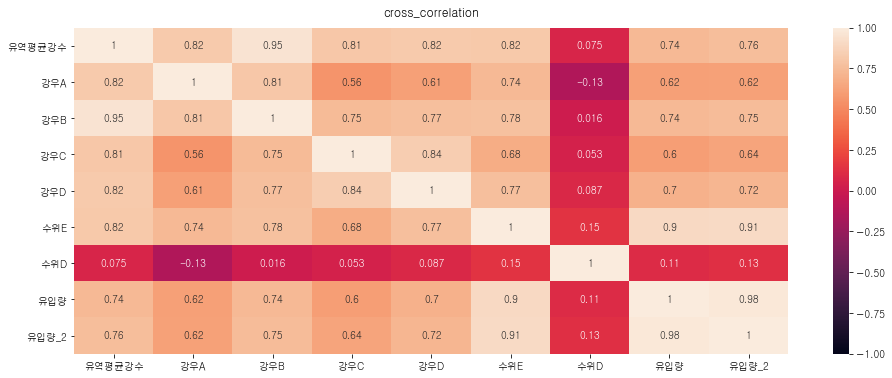

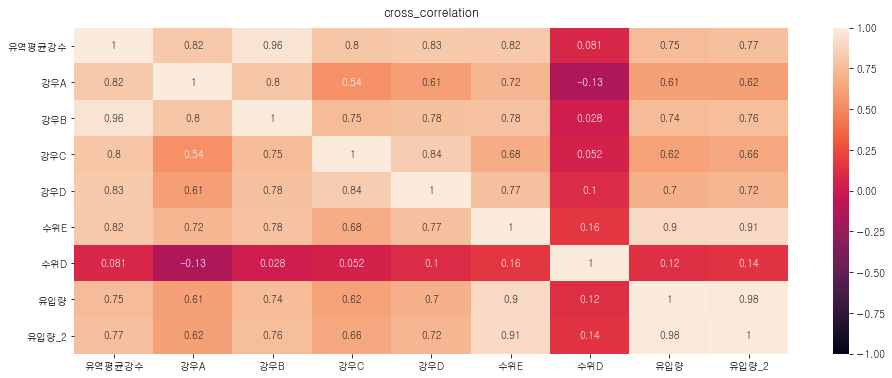

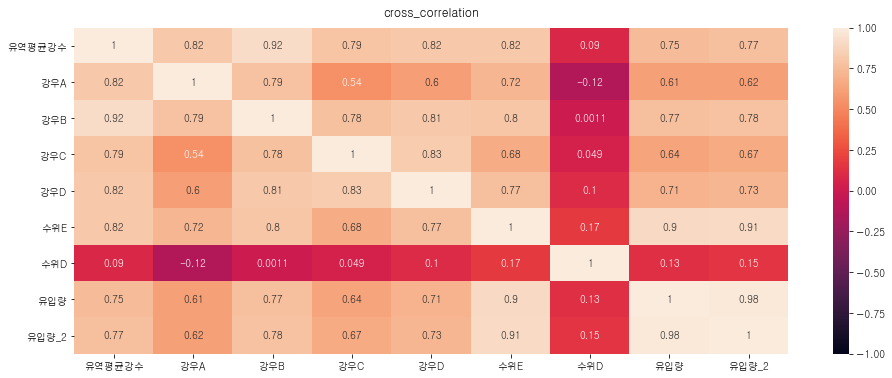

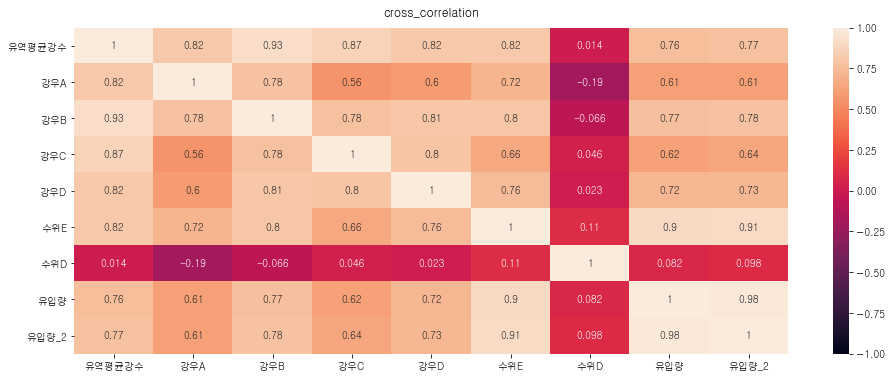

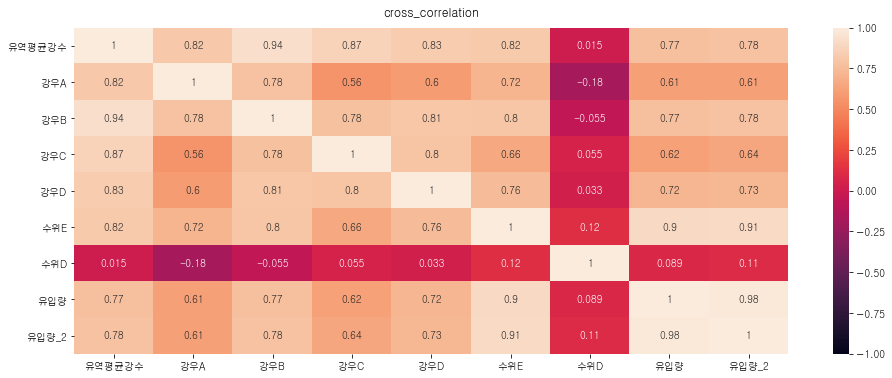

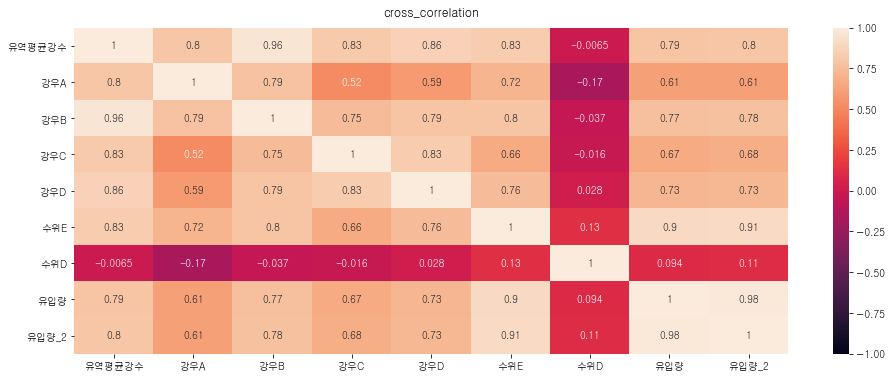

In [11]:
timelag_datasets = [timelag_dataset1, timelag_dataset2, timelag_dataset3,
                    timelag_dataset4, timelag_dataset5, timelag_dataset6]

#유입량 timelag=2인 데이터들의 correlation분석
for timelag_dataset in timelag_datasets:
    correlation(timelag_dataset,0)
    

 AutoML을 통한 분석모델 찾기

In [12]:

from pycaret.regression import *
from pycaret.utils import check_metric


data_pycaret = timelag_datasets[0][['유역평균강수','강우A','강우C','강우D','수위E','유입량_2']]
reg_pycaret = setup(data_pycaret, target='유입량_2', session_id=123, log_experiment=True,  experiment_name='유입량 예측')

,Description,Value
0,session_id,123
1,Target,유입량_2
2,Original Data,"(2841, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1988, 5)"


In [13]:
best_model = compare_models(fold=5, n_select=5, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,157.0938,126734.2124,354.6726,0.9720,0.1969,0.1185,0.0740
xgboost,Extreme Gradient Boosting,183.8682,139227.0531,371.9761,0.9699,0.2466,0.1613,0.2020
rf,Random Forest Regressor,193.4063,180633.0013,424.1743,0.9613,0.2296,0.1463,0.1060
gbr,Gradient Boosting Regressor,236.2944,186511.5301,430.9041,0.9596,0.3615,0.2997,0.0360
lightgbm,Light Gradient Boosting Machine,233.6601,289527.7914,532.8804,0.9429,0.2934,0.2188,0.1480
dt,Decision Tree Regressor,230.1131,293248.6643,540.0377,0.9353,0.2938,0.1602,0.0060
ada,AdaBoost Regressor,566.6462,539646.8085,733.0033,0.8837,0.9292,1.8781,0.0240
knn,K Neighbors Regressor,352.0518,696225.9469,798.1257,0.8649,0.4173,0.3519,0.0080
br,Bayesian Ridge,579.5353,828268.7013,903.6612,0.8348,0.8896,1.6153,0.0060
ridge,Ridge Regression,579.8781,828230.0625,903.6660,0.8348,0.8909,1.6178,0.0060


In [14]:
print(best_model)

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, sca

In [15]:
# tune_model5 = [tune_model(i) for i in best_model ]
# print(tune_model5)

In [16]:
# blend_model = blend_models(estimator_list=tune_model5)

In [17]:
# final_model = finalize_model(blend_model)
# prediction = predict_model(final_model, data=data_pycaret)

데이터세트(1~6)을 개별모델로 예측해서 평균

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler



def evaluate(y, pred):
    
    rmse_value = np.sqrt(mean_squared_error(y, pred))
    mae_value = mean_absolute_error(y, pred)
    r2_score_value = r2_score(y,pred)
    print("RMSE : {0:.3f}, MAE : {1:.3f}, R2_score : {2:.3f}".format(rmse_value, mae_value, r2_score_value))
    
def model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        predict_visualize(y_test, pred)
        evaluate(y_test, pred)
    print("---------",model.__class__.__name__,"---------")
    
    

def predict_visualize(y_test, pred):
    plt.figure(figsize=(7,7))
    plt.scatter(x=y_test, y=pred, edgecolor='k')
    plt.xlabel("y_test")
    plt.ylabel("pred")
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
    plt.show()


def train_test_scaler(timelag_dataset):

    scaler = MinMaxScaler()
    y_target = timelag_dataset['유입량_2']
    X_features = timelag_dataset[['유역평균강수', '강우A', '강우C', '강우D', '수위E']]
    X_features_scaled = scaler.fit_transform(X_features)
    y_target_log = np.log1p(y_target)
    # y_target_log.hist().set_title("유입량분포")
    # X_features_scaled.hist()
    
    return X_features_scaled, y_target_log    
    


In [19]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

et_reg = best_model[0]
xgb_reg = best_model[1]
rf_reg = best_model[2]
gb_reg = best_model[3]

def individual_model(timelag_dataset):
    
    X_features_scaled, y_target_log = train_test_scaler(timelag_dataset)

    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target_log, test_size=0.2, random_state=0)

    models =  [et_reg, rf_reg, gb_reg, xgb_reg]

    for model in models:
        model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

1  데이터세트의 개별모형 예측


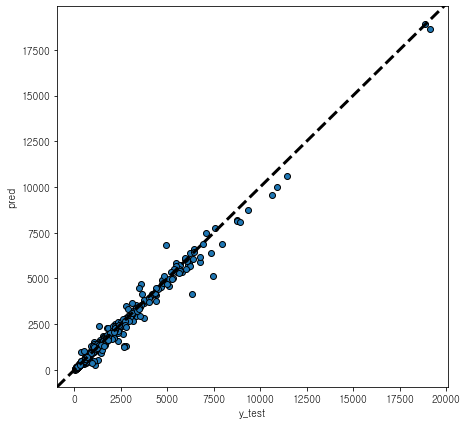

RMSE : 284.164, MAE : 126.397, R2_score : 0.982
--------- ExtraTreesRegressor ---------


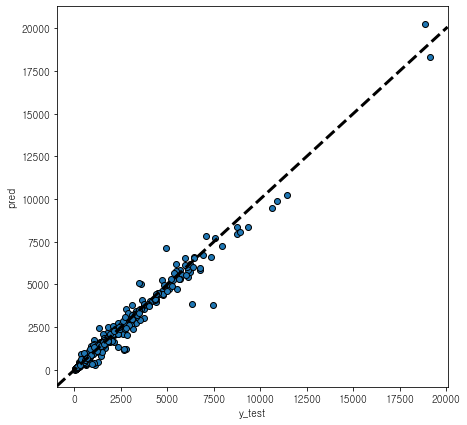

RMSE : 350.855, MAE : 157.674, R2_score : 0.973
--------- RandomForestRegressor ---------


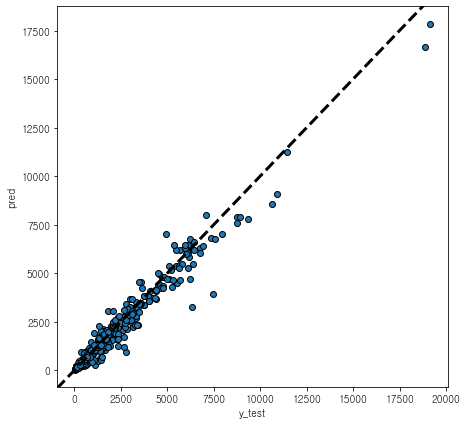

RMSE : 432.601, MAE : 234.442, R2_score : 0.958
--------- GradientBoostingRegressor ---------


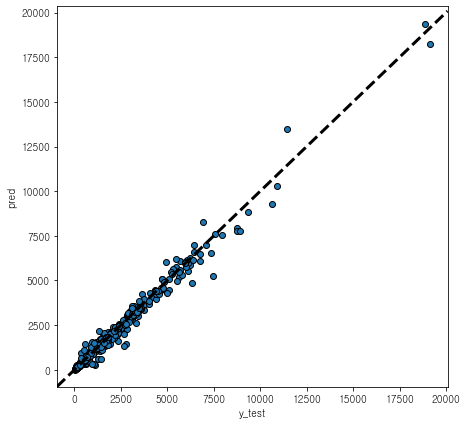

RMSE : 283.886, MAE : 142.940, R2_score : 0.982
--------- XGBRegressor ---------
2  데이터세트의 개별모형 예측


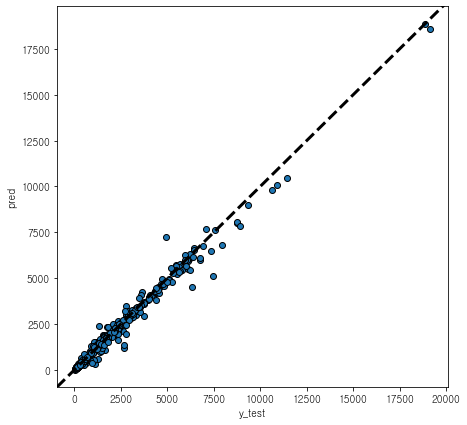

RMSE : 269.744, MAE : 116.736, R2_score : 0.984
--------- ExtraTreesRegressor ---------


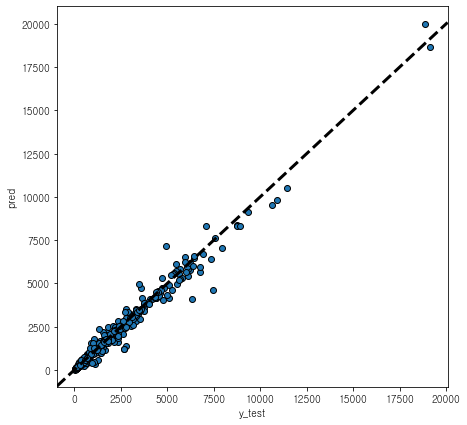

RMSE : 323.217, MAE : 150.500, R2_score : 0.977
--------- RandomForestRegressor ---------


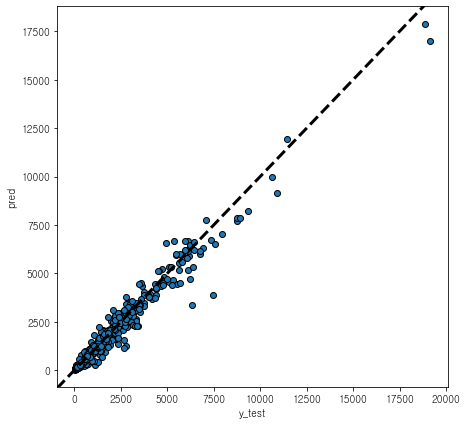

RMSE : 415.204, MAE : 231.547, R2_score : 0.962
--------- GradientBoostingRegressor ---------


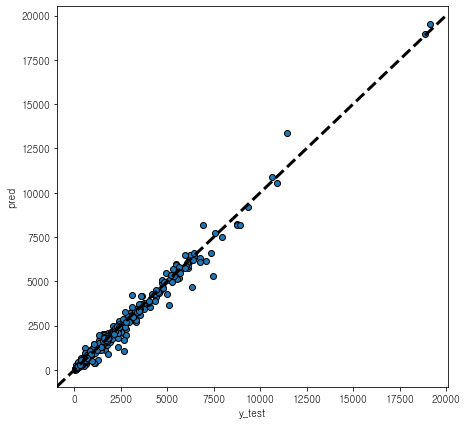

RMSE : 270.771, MAE : 137.781, R2_score : 0.984
--------- XGBRegressor ---------
3  데이터세트의 개별모형 예측


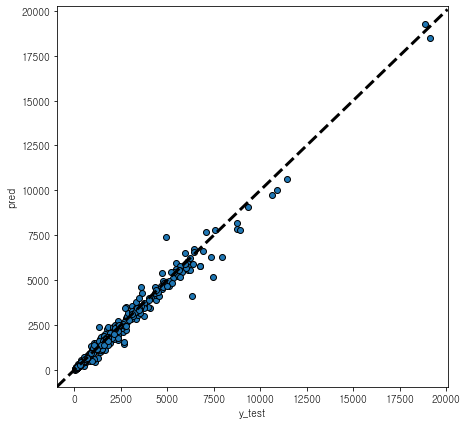

RMSE : 295.675, MAE : 134.734, R2_score : 0.981
--------- ExtraTreesRegressor ---------


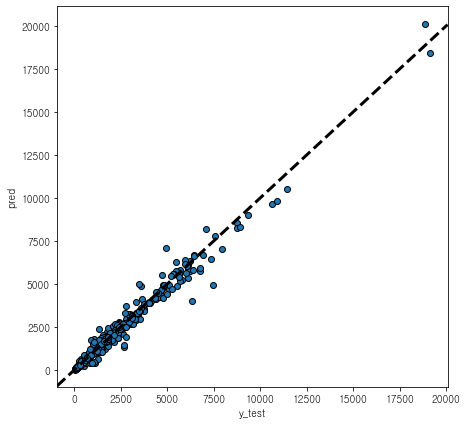

RMSE : 316.899, MAE : 153.823, R2_score : 0.978
--------- RandomForestRegressor ---------


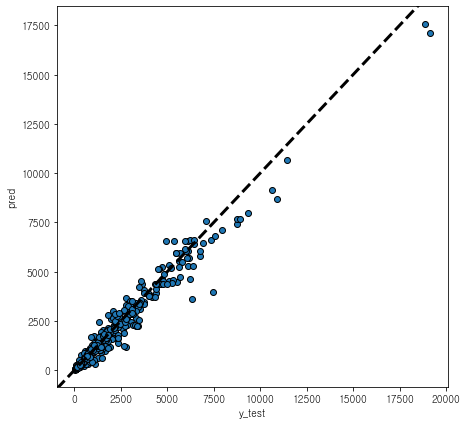

RMSE : 421.461, MAE : 231.657, R2_score : 0.961
--------- GradientBoostingRegressor ---------


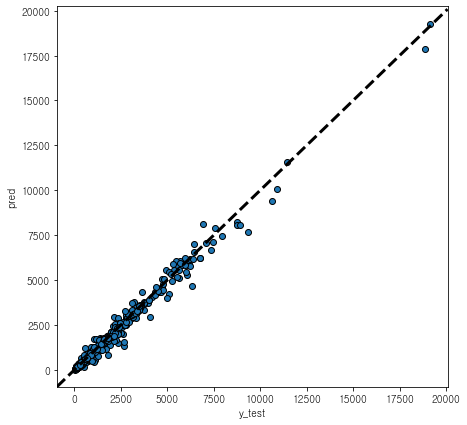

RMSE : 257.290, MAE : 136.195, R2_score : 0.985
--------- XGBRegressor ---------
4  데이터세트의 개별모형 예측


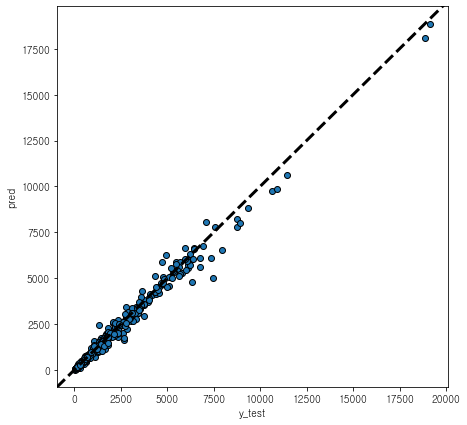

RMSE : 270.076, MAE : 126.000, R2_score : 0.984
--------- ExtraTreesRegressor ---------


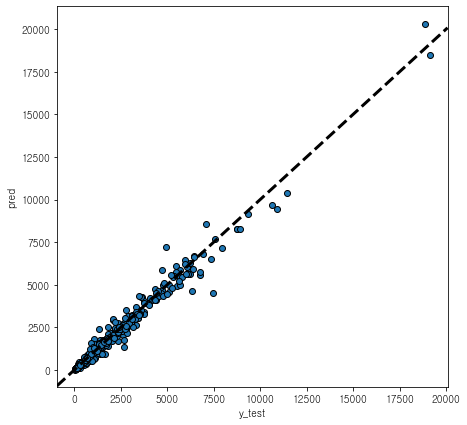

RMSE : 315.143, MAE : 151.362, R2_score : 0.978
--------- RandomForestRegressor ---------


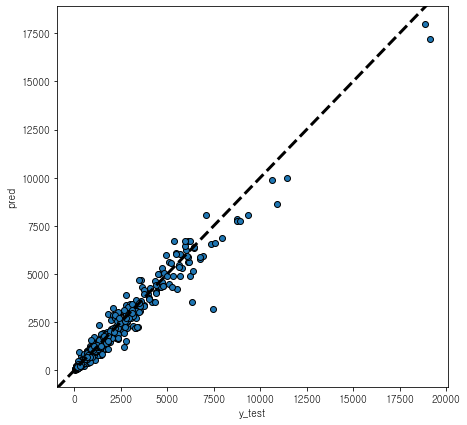

RMSE : 435.897, MAE : 240.607, R2_score : 0.958
--------- GradientBoostingRegressor ---------


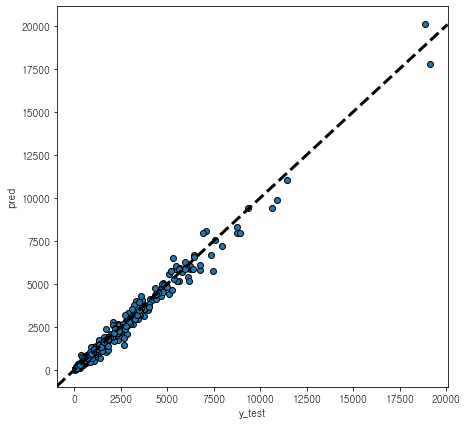

RMSE : 261.086, MAE : 138.233, R2_score : 0.985
--------- XGBRegressor ---------
5  데이터세트의 개별모형 예측


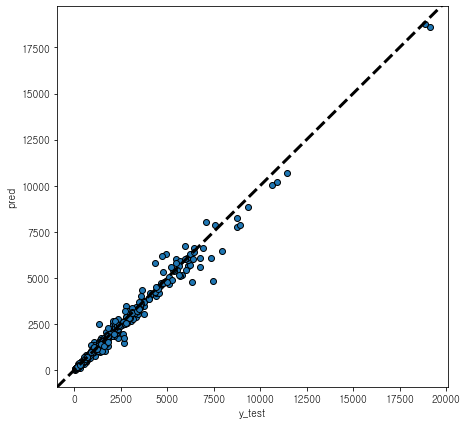

RMSE : 278.666, MAE : 124.733, R2_score : 0.983
--------- ExtraTreesRegressor ---------


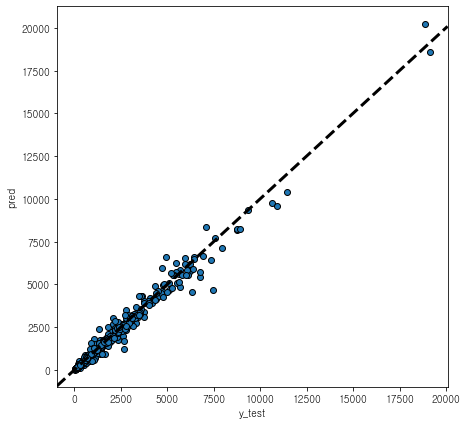

RMSE : 307.713, MAE : 150.864, R2_score : 0.979
--------- RandomForestRegressor ---------


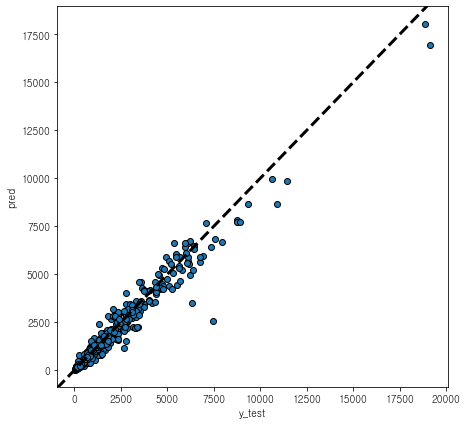

RMSE : 444.167, MAE : 238.246, R2_score : 0.956
--------- GradientBoostingRegressor ---------


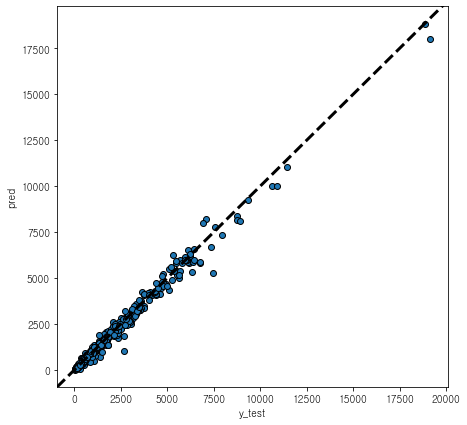

RMSE : 244.224, MAE : 130.086, R2_score : 0.987
--------- XGBRegressor ---------
6  데이터세트의 개별모형 예측


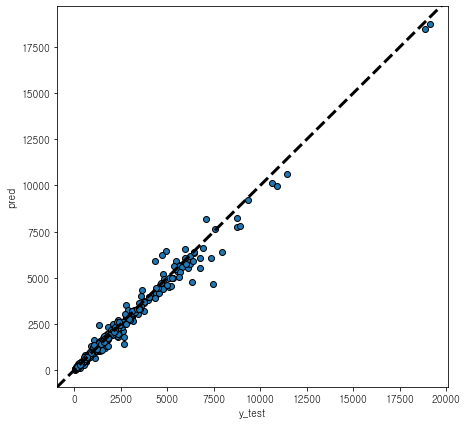

RMSE : 284.153, MAE : 124.964, R2_score : 0.982
--------- ExtraTreesRegressor ---------


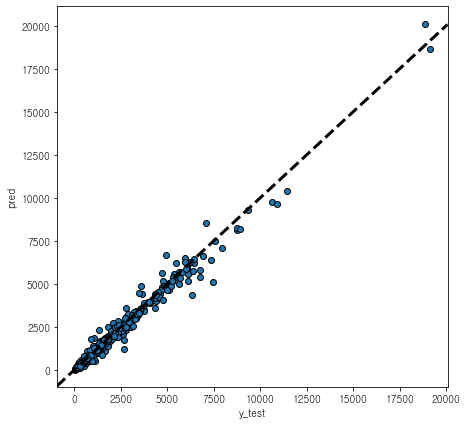

RMSE : 303.081, MAE : 147.012, R2_score : 0.980
--------- RandomForestRegressor ---------


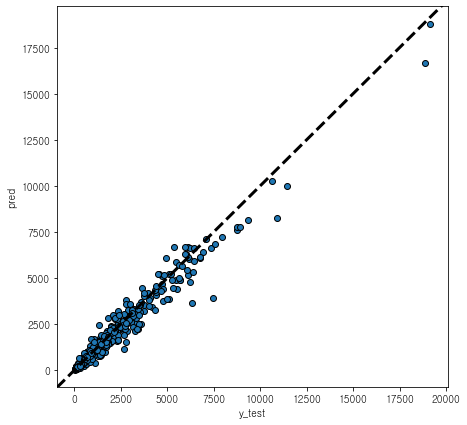

RMSE : 427.516, MAE : 232.860, R2_score : 0.959
--------- GradientBoostingRegressor ---------


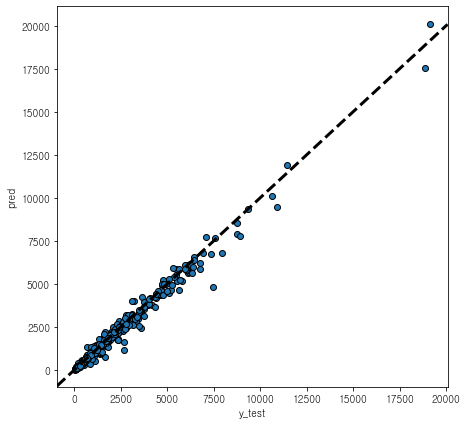

RMSE : 276.806, MAE : 142.879, R2_score : 0.983
--------- XGBRegressor ---------


In [20]:
for i, timelag_dataset in enumerate(timelag_datasets):
    print(i+1, " 데이터세트의 개별모형 예측")
    individual_model(timelag_dataset)

스태킹앙상블 모형 구현

In [21]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def stacking_data(model, X_train_n, y_train_n, X_test_n, n_folds ):
  
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        model.fit(X_tr , y_tr)       
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
           
   
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    return train_fold_pred , test_pred_mean

def stacking_predict(X_features, y_label):
    
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_features, y_label, test_size=0.2, random_state=0)
    
    
    X_train_o = X_train_s.values
    X_train_n = scaler.fit_transform(X_train_o)
    
    X_test_o = X_test_s.values
    X_test_n = scaler.fit_transform(X_test_o)
    
    y_train_o = y_train_s.values
    y_train_n = np.log1p(y_train_o)
    
    et_train, et_test = stacking_data(et_reg, X_train_n, y_train_n, X_test_n, 5)
    rf_train, rf_test = stacking_data(rf_reg, X_train_n, y_train_n, X_test_n, 5)
    xgb_train, xgb_test = stacking_data(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
    gb_train, gb_test = stacking_data(gb_reg, X_train_n, y_train_n, X_test_n, 5)
    
    Stack_final_X_train = np.concatenate((et_train, rf_train, xgb_train, gb_train), axis=1)
    Stack_final_X_train = np.expm1(Stack_final_X_train)
    
    Stack_final_X_test = np.concatenate((et_test, rf_test, xgb_test, gb_test), axis=1)
    Stack_final_X_test = np.expm1(Stack_final_X_test)
    
    final_model_et = XGBRegressor(n_estimators=1000, random_state=0)

    final_model_et.fit(Stack_final_X_train, y_train_o)
    final = final_model_et.predict(Stack_final_X_test)
    
    
    return final, y_test_s

In [22]:
timelag_datasets = [timelag_dataset1, timelag_dataset2, timelag_dataset3,
                   timelag_dataset4, timelag_dataset5, timelag_dataset6]

timelag_X = []

for timelag_dataset in timelag_datasets:
    timelag_dataset.drop(['강우B', '수위D'], axis=1 , inplace = True)
    timelag_X.append(timelag_dataset.iloc[:,:5])

X_features = pd.concat(timelag_X, axis=1)
y_label = timelag_dataset1.iloc[:,-1]

final_list = []
for i in range(0,6):
    final, y_test_s = stacking_predict(X_features.iloc[:,5*i:5*i+5], y_label)
    
    final_list.append(final)
    
final_list = np.array(final_list)


ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 


In [23]:
final_avg = 0.5/6*final_list[0] + 0.7/6*final_list[1] +1/6*final_list[2]+ 1/6*final_list[3]+ 1.3/6*final_list[4] + 1.5/6*final_list[5]

evaluate(y_test_s, final_avg)

RMSE : 259.740, MAE : 141.686, R2_score : 0.985


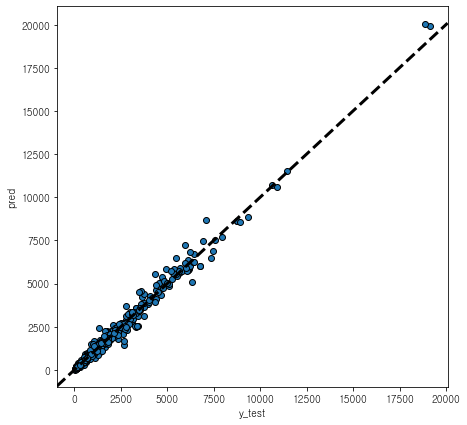

In [24]:
predict_visualize(y_test_s, final_avg)


평가데이터 예측

In [25]:
predict_data = data[data['홍수사상번호']==26]
predict_data

,홍수사상번호,유입량,유역평균강수,강우A,강우B,강우C,강우D,수위E,수위D,유역평균강수,...,강우D,수위E,수위D,유역평균강수,강우A,강우B,강우C,강우D,수위E,수위D
2892,26.0,NaN,14.2576,32,0,0,0,1.93,120.49375,10.9657,...,0,1.93,120.528,0.8413,32,0,1,0,1.93,120.515
2893,26.0,NaN,10.9657,20,1,0,0,1.93,120.4875,7.9442,...,8,1.93,120.524,4.7653,21,1,14,8,1.93,120.51
2894,26.0,NaN,7.9442,11,5,0,0,1.92,120.48125,7.8916,...,24,1.92,120.52,12.9398,21,5,19,24,1.92,120.505
2895,26.0,NaN,7.8916,3,11,0,0,1.92,120.475,13.3484,...,33,1.92,120.516,19.6616,18,11,22,33,1.92,120.5
2896,26.0,NaN,13.3484,4,25,1,8,1.92,120.475,20.076,...,36,1.92,120.512,26.6211,20,25,23,36,1.92,120.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,NaN,2.3689,1,0,0,0,3.16,129.99375,2.3689,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.95
3048,26.0,NaN,2.3689,1,0,0,0,3.15,130.00625,2.3689,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.97
3049,26.0,NaN,2.3689,1,0,0,0,3.13,130.0125,2.3689,...,0,3.13,129.94,2.0354,1,0,0,0,3.13,129.98
3050,26.0,NaN,2.3689,1,0,0,0,3.11,130.01875,2.3689,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.99


In [26]:
def final_predict(X_features, y_label):
    
   
    X_features = scaler.fit_transform(X_features)
    X_train_n = X_features[:-160,:]
    X_test_n = X_features[-160:,:]
  
    
    y_train_o = y_label.values
    y_train_n = np.log1p(y_train_o)
    
    et_train, et_test = stacking_data(et_reg, X_train_n, y_train_n, X_test_n, 5)
    rf_train, rf_test = stacking_data(rf_reg, X_train_n, y_train_n, X_test_n, 5)
    xgb_train, xgb_test = stacking_data(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
    gb_train, gb_test = stacking_data(gb_reg, X_train_n, y_train_n, X_test_n, 5)
    
    Stack_final_X_train = np.concatenate((et_train, rf_train, xgb_train, gb_train), axis=1)
    Stack_final_X_train = np.expm1(Stack_final_X_train)
    
    Stack_final_X_test = np.concatenate((et_test, rf_test, xgb_test, gb_test), axis=1)
    Stack_final_X_test = np.expm1(Stack_final_X_test)
    
    final_model_et = XGBRegressor(n_estimators=1000, random_state=121)

    final_model_et.fit(Stack_final_X_train, y_train_o)
    final = final_model_et.predict(Stack_final_X_test)
    
    
    return final

In [27]:
predict_X = []

for i in range(0,6):
    
    aa = predict_data.iloc[:,7*i+2:7*i+9]
    
    aa.drop(['강우B', '수위D'], axis=1, inplace=True)
    
    predict_X.append(aa)
    
X_features_predict = pd.concat(predict_X, axis=1)
X_feature_final = pd.concat([X_features,X_features_predict], axis=0)

In [28]:
final_predict_list = []
for i in range(0,6):
    bb = final_predict(X_feature_final.iloc[:,5*i:5*i+5], y_label)
    final_predict_list.append(bb)
    
    
    
final_predict_list = np.array(final_predict_list)


ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 
ExtraTreesRegressor  model 시작 
RandomForestRegressor  model 시작 
XGBRegressor  model 시작 
GradientBoostingRegressor  model 시작 


In [29]:
final_predict_avg = 0.5/6*final_predict_list[0] + 0.7/6*final_predict_list[1] + 1/6*final_predict_list[2]+ 1/6*final_predict_list[3]+ 1.3/6*final_predict_list[4] + 1.5/6*final_predict_list[5]

final_predict_avg

array([ 112.04007 ,   98.817696,  129.44202 ,  144.96935 ,  191.50862 ,
        204.18425 ,  229.18956 ,  265.09344 ,  250.34572 ,  287.95813 ,
        336.70917 ,  345.68277 ,  465.4303  ,  899.58075 ,  880.0727  ,
        967.46564 , 1029.9053  , 1032.2728  , 1236.4568  , 1216.9054  ,
       1428.6323  , 1436.6423  , 1840.5071  , 1686.5841  , 1966.6526  ,
       2137.386   , 2951.0005  , 3374.457   , 3486.3894  , 3700.506   ,
       3736.6284  , 3950.5247  , 4170.508   , 3929.1914  , 3887.166   ,
       4224.741   , 4061.325   , 3720.6765  , 3624.0476  , 3319.0515  ,
       3448.627   , 3431.813   , 3266.308   , 3467.6147  , 3240.4312  ,
       3143.8774  , 3244.052   , 2550.6323  , 2247.764   , 2450.8782  ,
       2413.23    , 2160.6199  , 2022.7236  , 2085.7373  , 1754.0706  ,
       1634.2654  , 1597.1683  , 1418.6877  , 1432.2584  , 1339.7555  ,
       1339.254   , 1346.4321  , 1432.9794  , 1346.8785  , 1337.7646  ,
       1206.96    , 1105.6658  , 1099.3462  , 1118.5425  , 1113.

In [30]:
test_data = pd.read_excel("./2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_평가데이터_210803.xlsx")
test_data.head()

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,106.240293
2,2.0,26.0,2018.0,7.0,1.0,7.0,106.240293
3,3.0,26.0,2018.0,7.0,1.0,8.0,106.240293
4,4.0,26.0,2018.0,7.0,1.0,9.0,105.428293


In [31]:
test_data.iloc[3:161, 6] = final_predict_avg[:-2]
test_data.iloc[1:3,6] = final_predict_avg[0]
test_data

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,112.040070
2,2.0,26.0,2018.0,7.0,1.0,7.0,112.040070
3,3.0,26.0,2018.0,7.0,1.0,8.0,112.040070
4,4.0,26.0,2018.0,7.0,1.0,9.0,98.817696
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,486.999451
157,157.0,26.0,2018.0,7.0,7.0,18.0,454.030426
158,158.0,26.0,2018.0,7.0,7.0,19.0,418.221191
159,159.0,26.0,2018.0,7.0,7.0,20.0,427.547150


In [32]:
test_data

,NO,홍수사상번호,연,월,일,시간,유입량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,26.0,2018.0,7.0,1.0,6.0,112.040070
2,2.0,26.0,2018.0,7.0,1.0,7.0,112.040070
3,3.0,26.0,2018.0,7.0,1.0,8.0,112.040070
4,4.0,26.0,2018.0,7.0,1.0,9.0,98.817696
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,486.999451
157,157.0,26.0,2018.0,7.0,7.0,18.0,454.030426
158,158.0,26.0,2018.0,7.0,7.0,19.0,418.221191
159,159.0,26.0,2018.0,7.0,7.0,20.0,427.547150


In [33]:
test_data.to_excel('test.xlsx')